### Assignment[-1] : The last assignment
목적: 학습된 모델을 불러와서 이미지를 테스트해봅니다.

In [1]:
import socket
hostname = socket.gethostname()
print(hostname)

devbox20


In [2]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
tf.__version__, tf.keras.__version__

('2.3.0', '2.4.0')

In [4]:
from nnutil_20 import imshow
from nnutil_20 import center_crop
from nnutil_20 import random_crop

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

### 학습된 모델 불러오기

In [6]:
model_fn = 'handpose_224.h5'

In [7]:
model = keras.models.load_model(model_fn)

잘 불러와졌는지 확인해봅니다.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0

In [9]:
n_classes = model.get_layer('dense_1').output_shape[-1] 
print(n_classes)
# 마지막 레이어의 형상이 6인데, 이를 클래스 갯수로 활용
# https://stackoverflow.com/a/49527269

6


### 테스트할 사진 불러오기

In [10]:
import glob
types = ('*.jpg', '*.JPG', '*.png') # the tuple of file types
files_grabbed = []

for fmt in types:
    files_grabbed.extend(glob.glob('/home/hyerin/data/HandPose20_small/handpose_20F_small_training/C1/'+fmt))

<b>아래의 idx 변수를 바꾸어</b> 기존 제공된 데이터를 테스트할 수 있음

In [11]:
idx = 1366 #인덱스를 위의 셀 결과를 참고하여 바꾸어 보세요. 
fn_test = files_grabbed[idx] 
print(fn_test)

/home/hyerin/data/HandPose20_small/handpose_20F_small_training/C1/IMG_4016_small.jpg


In [12]:
f=1.0# 약간 변경 가능 예) 1.0 ~1.3 사이
target_size=(int(300//f), int(400//f))
print(target_size)

(300, 400)


In [13]:
img = keras.preprocessing.image.load_img(fn_test, target_size=target_size)
input_arr = keras.preprocessing.image.img_to_array(img)

input_arr = input_arr/255.0
print(input_arr.shape)

(300, 400, 3)


In [14]:
# imshow(input_arr, title=fn_test)

### 이미지를 정사각형으로 잘라서 테스트 해보기
실제 학습할 때 아래처럼 정사각형 형태로 잘라서 학습을 하였습니다.

In [15]:
# 아래의 숫자를 변경하지 마세요.
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

In [16]:
img_square = center_crop(input_arr, crop_size=(w,w))
#img_square = random_crop(input_arr, crop_size=(100,100))
# imshow(img_square, title='{} {}'.format(fn_test.split('/')[-1], img_square.shape))

In [17]:
#input_arr = keras.preprocessing.image.img_to_array(img_square)
input_sqaure_arr = np.array([img_square]) #Convert single image to a batch.
print(input_sqaure_arr.shape)

(1, 224, 224, 3)


In [18]:
predictions_array =  model.predict(input_sqaure_arr)
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'IMG_4016_small.jpg/ Pred.: #1 --> 85.9328%')

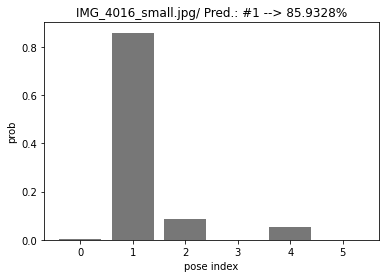

In [19]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('{}/ Pred.: #{} --> {:.4f}%'.format(fn_test.split('/')[-1], max_idx, max_prob*100.0))

In [20]:
# imshow(img_square, title='{}  Pred.: #{} --> {:.3f}%'.format(fn_test.split('/')[-1],  max_idx, max_prob*100.0))

In [21]:
# fn_test = 'dataset_test/bbb.jpg' # 여러분의 새로운 파일로 대체해주세요. 
# print(fn_test)ㅌ
# raise NotImplementedError  ㅌ# 이 줄은 구현이 되면 삭제 해주세요

## feature map 출력해보기

모델에 적용된 레이어 확인하기

In [22]:
model.layers

In [23]:
layer_num = 9
layer_outputs = [layer.output for layer in model.layers[:layer_num]]
layer_names = [layer.name for layer in model.layers[:layer_num]]

In [24]:
layer_outputs

[<tf.Tensor 'conv2d/Relu:0' shape=(None, 222, 222, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(None, 111, 111, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Relu:0' shape=(None, 109, 109, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(None, 107, 107, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(None, 53, 53, 64) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(None, 51, 51, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 25, 25, 128) dtype=float32>,
 <tf.Tensor 'conv2d_4/Relu:0' shape=(None, 23, 23, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(None, 11, 11, 128) dtype=float32>]

모델 

In [25]:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [26]:
activations = activation_model.predict(input_sqaure_arr)

In [27]:
activations[8].shape

(1, 11, 11, 128)

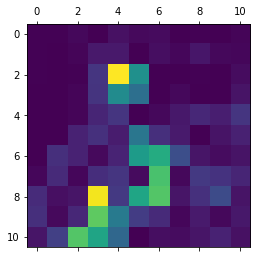

In [28]:
one_layer_activation = activations[8]
plt.matshow(one_layer_activation[0, :, :, 23], cmap='viridis')
plt.show()

In [29]:
one_layer_activation.shape

(1, 11, 11, 128)

In [30]:
one_layer_activation.shape

(1, 11, 11, 128)

/home/hyerin/.venv/py369/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


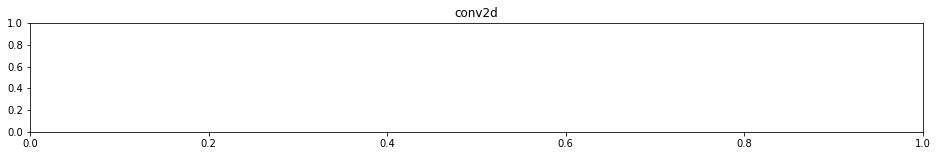

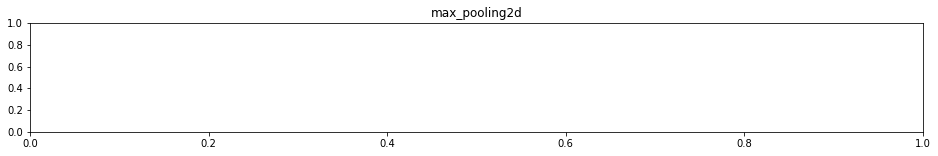

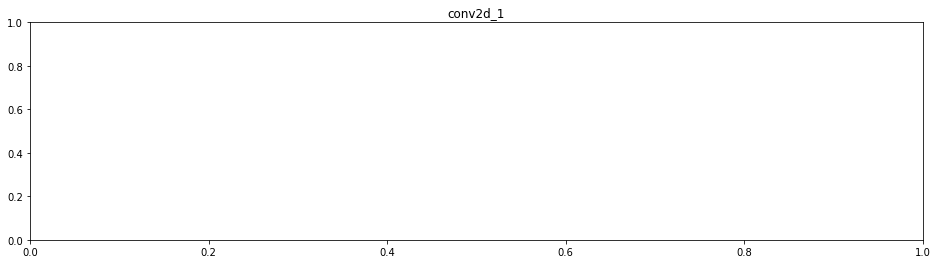

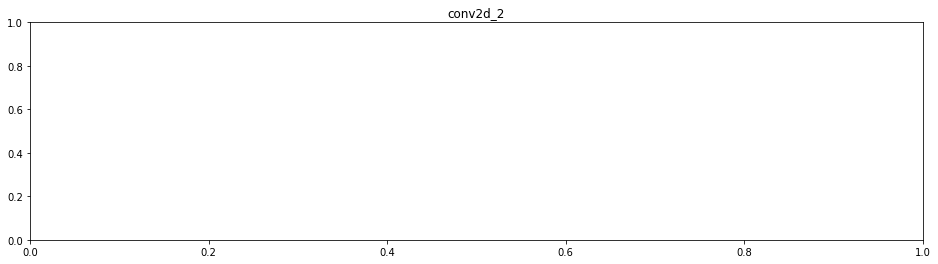

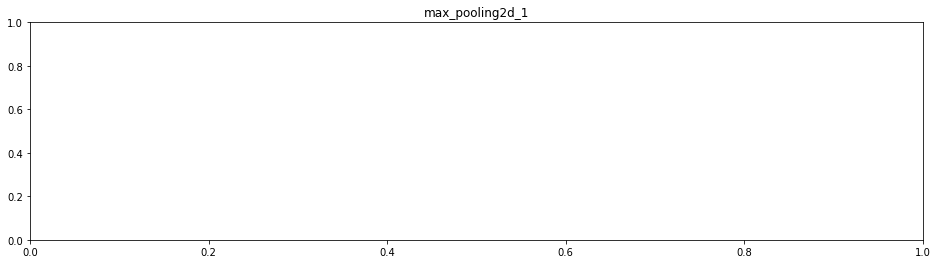

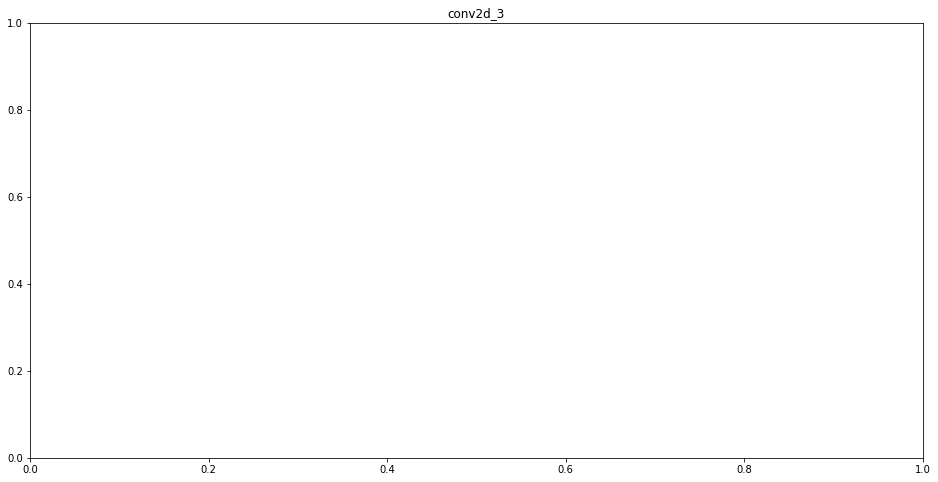

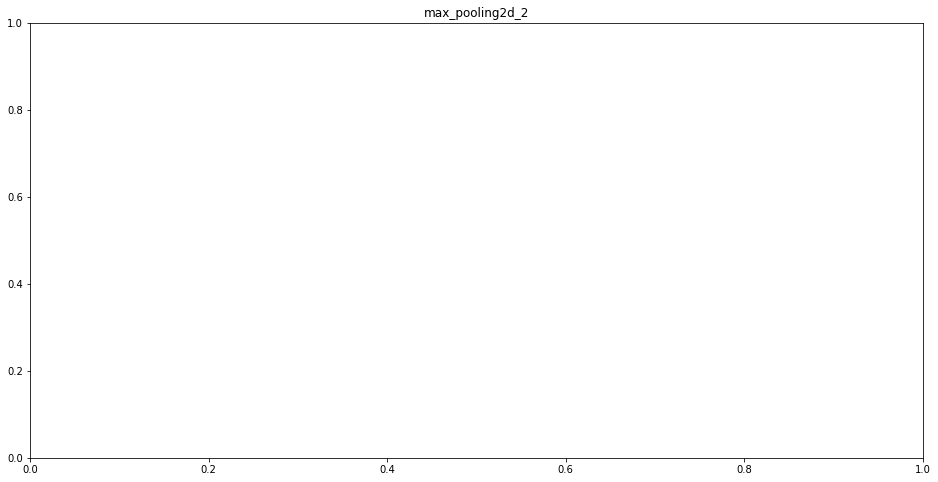

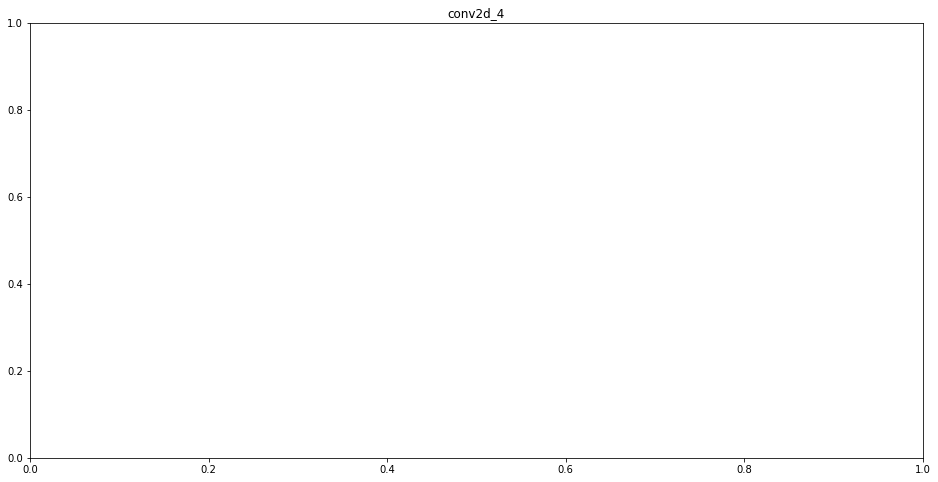

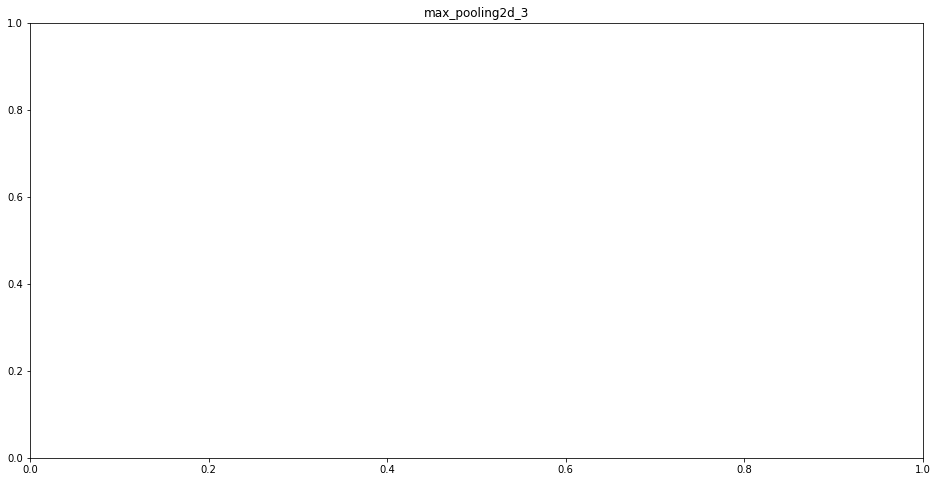

In [31]:
# layer 이름을 그래프 제목으로 사용
layer_names = []
for layer in model.layers[:layer_num]:
    layer_names.append(layer.name)

images_per_row = 16

# visualize feature map 
for layer_name, layer_activation in zip(layer_names, activations):
    # feature map 에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # feature map의 크기 = (1, size, size, n_features)
    size = layer_activation.shape[1]

    # activation channel 을 위한 그리드 크기를 구함
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
  
    # 각 활성화를 하나의 큰 그리드에 채움
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드 출력
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
#     plt.imshow(display_grid, aspect='auto', cmap='viridis')

# plt.show()